In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Bidirectional, LSTM, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

import numpy as np
from matplotlib import pyplot as plt

print(tf.__version__)

2.2.0


In [0]:
# Loading the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWEYNB3/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWEYNB3/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWEYNB3/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [0]:
# Prepping the data a little
x_train, y_train, x_test, y_test = [], [], [], []

for x in ds_train:
  text = str(x[0].numpy()).split("b", 1)[1][1:-1]
  label = x[1].numpy()
  x_train.append(text)
  y_train.append(label)

for x in ds_test:
  text = str(x[0].numpy()).split("b", 1)[1][1:-1]
  label = x[1].numpy()
  x_test.append(text)
  y_test.append(label)

x_train, y_train, x_test, y_test = np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

print(x_train.shape, y_train.shape)

(25000,) (25000,)


In [0]:
vocab_size = 20000

tokenizer = Tokenizer(num_words = vocab_size, lower = True, oov_token = '<OOV>')
tokenizer.fit_on_texts(x_train)


In [0]:
maxlen = 50
padding = 'post'
truncating = 'post'

sequences = tokenizer.texts_to_sequences(x_train)
seq_train = pad_sequences(sequences, maxlen = maxlen, padding = padding, truncating = truncating)

test_sequences = tokenizer.texts_to_sequences(x_test)
seq_test = pad_sequences(test_sequences, maxlen = maxlen, padding = padding, truncating = truncating)

In [0]:
embedding_dim = 100

model = Sequential([
                    Embedding(input_dim = vocab_size+1, output_dim= embedding_dim, input_length = maxlen),
                    Bidirectional(LSTM(64)),
                    Dense(32, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2000100   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               84480     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,088,741
Trainable params: 2,088,741
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(seq_train, y_train, batch_size=10000, epochs = 10, validation_data = (seq_test, y_test))

Epoch 1/10
3/3 [==============================] - 18s 6s/step - loss: 0.6930 - accuracy: 0.5090 - val_loss: 0.6920 - val_accuracy: 0.5622
Epoch 2/10
3/3 [==============================] - 17s 6s/step - loss: 0.6907 - accuracy: 0.6031 - val_loss: 0.6892 - val_accuracy: 0.6016
Epoch 3/10
3/3 [==============================] - 17s 6s/step - loss: 0.6859 - accuracy: 0.6403 - val_loss: 0.6832 - val_accuracy: 0.6151
Epoch 4/10
3/3 [==============================] - 18s 6s/step - loss: 0.6760 - accuracy: 0.6615 - val_loss: 0.6705 - val_accuracy: 0.6406
Epoch 5/10
3/3 [==============================] - 17s 6s/step - loss: 0.6552 - accuracy: 0.6878 - val_loss: 0.6431 - val_accuracy: 0.6668
Epoch 6/10
3/3 [==============================] - 18s 6s/step - loss: 0.6126 - accuracy: 0.7090 - val_loss: 0.6009 - val_accuracy: 0.6812
Epoch 7/10
3/3 [==============================] - 18s 6s/step - loss: 0.5556 - accuracy: 0.7228 - val_loss: 0.5872 - val_accuracy: 0.7042
Epoch 8/10
3/3 [==================

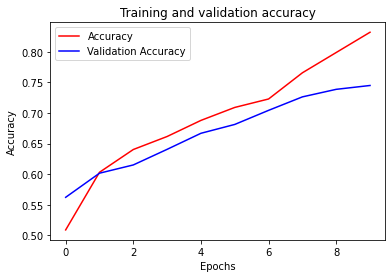

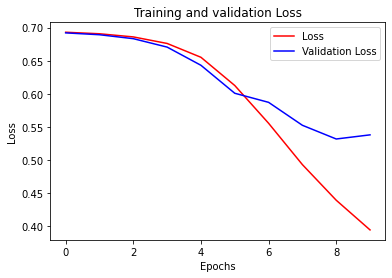

In [0]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

In [0]:
# Extracting the Embeddings
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)

(20001, 100)


In [0]:
print(tokenizer.word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, "'s": 21, 'on': 22, 'you': 23, 'not': 24, 'are': 25, 'his': 26, 'he': 27, 'have': 28, 'be': 29, 'one': 30, 'all': 31, 'at': 32, 'by': 33, 'they': 34, 'an': 35, 'who': 36, 'so': 37, 'from': 38, 'like': 39, 'her': 40, "'t": 41, 'or': 42, 'just': 43, 'there': 44, 'about': 45, 'out': 46, 'if': 47, 'has': 48, 'what': 49, 'some': 50, 'good': 51, 'more': 52, 'when': 53, 'very': 54, 'she': 55, 'up': 56, 'can': 57, 'time': 58, 'no': 59, 'even': 60, 'my': 61, 'would': 62, 'which': 63, 'story': 64, 'only': 65, 'really': 66, 'see': 67, 'their': 68, 'had': 69, 'were': 70, 'me': 71, 'well': 72, 'we': 73, 'than': 74, 'much': 75, 'been': 76, 'get': 77, 'bad': 78, 'people': 79, 'will': 80, 'do': 81, 'also': 82, 'other': 83, 'into': 84, 'first': 85, 'because': 86, 'great': 87, 'how': 88, 'him': 89,

In [0]:
word_index = {e:i for e,i in tokenizer.word_index.items() if i <= vocab_size}

print(word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10, 'i': 11, 'this': 12, 'that': 13, 'was': 14, 'as': 15, 'for': 16, 'with': 17, 'movie': 18, 'but': 19, 'film': 20, "'s": 21, 'on': 22, 'you': 23, 'not': 24, 'are': 25, 'his': 26, 'he': 27, 'have': 28, 'be': 29, 'one': 30, 'all': 31, 'at': 32, 'by': 33, 'they': 34, 'an': 35, 'who': 36, 'so': 37, 'from': 38, 'like': 39, 'her': 40, "'t": 41, 'or': 42, 'just': 43, 'there': 44, 'about': 45, 'out': 46, 'if': 47, 'has': 48, 'what': 49, 'some': 50, 'good': 51, 'more': 52, 'when': 53, 'very': 54, 'she': 55, 'up': 56, 'can': 57, 'time': 58, 'no': 59, 'even': 60, 'my': 61, 'would': 62, 'which': 63, 'story': 64, 'only': 65, 'really': 66, 'see': 67, 'their': 68, 'had': 69, 'were': 70, 'me': 71, 'well': 72, 'we': 73, 'than': 74, 'much': 75, 'been': 76, 'get': 77, 'bad': 78, 'people': 79, 'will': 80, 'do': 81, 'also': 82, 'other': 83, 'into': 84, 'first': 85, 'because': 86, 'great': 87, 'how': 88, 'him': 89,

In [0]:
# Saving the weights
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word in word_index:
  vec = weights[ int(word_index[word]) - 1] # skip 0, it's padding.
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

In [0]:
# Downloading the weights

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')